In [2]:
# Task 1: Computing the cost function
# yn is approximated by w0 + w1xn1. Height is used as the input variable, and weight as the output
# Coefficients w0 and w1 are the model parameters. A mean-square-error is defined on the next line
# 1/2N sum(y-f(x1))^2. We are required to find w0 and w1 that will minimize this cost function

# Extracting data from HTML and converting to arrays for algorithm

import requests
import io
import numpy as np
import matplotlib.pyplot as plt

html = 'https://raw.githubusercontent.com/epfml/ML_course/master/labs/ex02/template/height_weight_genders.csv'
pull = requests.get(html).content
strings = io.StringIO(pull.decode('utf-8'))
# print(strings.getvalue())

# Creating array

height_list = [] # strip strings into lists first
weight_list = []
for idx, line in enumerate(strings.readlines()):
    if idx == 0:
        pass
    else:
        split = line.split(',')
        #print(float(split[1]))
        h = float(split[1])
        w = float(split[2])
        height_list.append(h)
        weight_list.append(w)

height = np.matrix(height_list).T
# standardize and normalize the features
column_variance = []
height_scaled = np.copy(height)

for idx, column in enumerate(height_scaled.T):
    mean = np.mean(column)
    variance = np.std(column)
    for entry, value in enumerate(column):
        height_scaled[entry, idx] = (value - mean)/variance # scale dat shit

ones = np.matrix(np.ones(height_scaled.size)).T
X = np.concatenate((ones, height_scaled), axis=1) # appending column of 1 for w0

target = np.matrix(weight_list).T
target_scaled = np.copy(target)

for idx, column in enumerate(target.T):
    mean = np.mean(column)
    variance = np.std(column)
    for entry, value in enumerate(column.T):
        target_scaled[entry, idx] = (value - mean)/variance # scale dat shit

print('The number of samples in this dataset is {}'.format(height.size))

# Computing MSE


def compute_MSE(y, tx, w):
    # X is the augmented matrix with ones appended
    if y.shape[0] == tx.shape[0] and w.shape[1] == tx.shape[1]:
        error = np.matrix(y).T - np.dot(tx, w.T) # the dotproduct is 1000x1
        sum_sqrd = np.linalg.norm(error, 2) ** 2
        # sum_sqrd = np.square(error)
        mse = np.sum(sum_sqrd) / (2 * X.shape[0])
        # print(mse)
        return mse
    else:
        'Incompatible dimensions for y and training data'

# w = np.matrix([1,2])

#compute_MSE(y, X, w)


The number of samples in this dataset is 10000


In [3]:
# Task 2: Grid search
# Fill in a function grid.search(y, tx, w0, w1) to implement grid search.
# Per for loop: one dimension and compute the cost function for each setting of w0 and w1
# When all values of the cost function are stored in the variable loss, the code finds a minimum
# Code prints obtained minimum value of the cost function with determined w0 and w1.
# Also a contour plot and the plot of the fit



def grid_search(y, tx, w0, w1, plot=True):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # y is a numpy array of target values (weight)
    # tx is a numpy augmented matrix (with ones) of training values
    # w0 and w1 are numpy arrays of the range to form the grid

    # Make a matrix 400 x 400 with all the entry pairs of w0,w1

    w_tuples = []
    for value in w0:
        [w_tuples.append((value, value2)) for value2 in w1]

    grid = np.empty([0, 3])
    for value in w_tuples:
        w_reformed = np.matrix(value)
        meanerror = compute_MSE(y, tx, w_reformed)
        to_append = np.matrix([float(meanerror), value[0], value[1]])
        # print(to_append)
        # create matrix with meanerror, and in the other columns values for w0 and w1 for that given error then idx
        grid = np.concatenate((grid, to_append), axis=0)

    idx_min = np.argmin(grid[:, 0])
    print('The lowest error is {} with w0 value of {} and w1 value of {}'.format(grid[idx_min,0], grid[idx_min, 1], grid[idx_min, 2]))

    if plot:

        z_plot = np.zeros((100,1))
        column = []
        for value in grid[:, 0].tolist():
            if len(column) < 100:
                column.append(value[0])
            if len(column) == 100:
                z_plot = np.concatenate((z_plot, np.matrix(column).T), axis=1)
                column = []
        z_plot = z_plot[:,1:]
        # fig, ax = plt.subplots()
        # CS = ax.contour(w0, w1, z_plot)
        # ax.clabel(CS, inline=1, fontsize=10)
        # ax.set_title('Contour plot')

        plt.scatter(height_list, weight_list, c='blue')
        plt.plot([0, 100],[grid[idx_min, 1], 100 * grid[idx_min, 2] + grid[idx_min, 1]], c='red')
        plt.show()


# Initiate w0 and w1 pairs

# w0 = np.arange(-200, -150, 0.5)
# w1 = np.arange(-10, 10, 0.2)
# np.set_printoptions(threshold=np.nan)





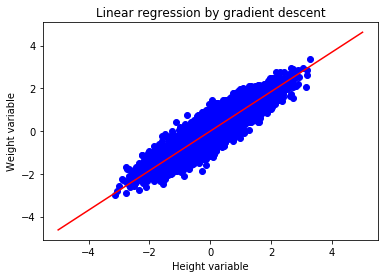

Values for w are [[-3.74602940e-13]
 [ 9.24756299e-01]] and the gradient right now is [[-4.16582679e-13]
 [-4.35716174e-13]]


In [64]:
# Task 3: Gradient Descent
# We have already derived the gradient of the MSE function for linear regression


# write function for gradient descent

def gradient_descent(y, tx, w, step, iterations):

    # y is a numpy column of target values
    # tx is the augmented matrix x with samples in rows and dimensions in columns
    # w is the np row array of w values
    # step is the step size over which w is modified. int < 1
    # iterations is the number of iterations to consider. int

    # create function that computes gradients
    def compute_gradient(y, tx, w):
        error = y - np.dot(tx, w)
        grad = - np.dot(tx.T, error) / tx.shape[0]
        return grad

    for i in np.arange(iterations):
        gradient = compute_gradient(y, tx, w)
        # print(gradient)
        w = w - step * gradient
        # print('Loop {}. The new value of w is {} and the gradient was {}'.format(i, w, gradient))

    plt.scatter(height_scaled, target_scaled, c='blue')
    plt.plot([-5, 5], [-5 * w.item(1) + w.item(0), 5 * w.item(1) + w.item(0)], c='red')
    plt.xlabel('Height variable')
    plt.ylabel('Weight variable')
    plt.title('Linear regression by gradient descent')
    plt.show()
    print('Values for w are {} and the gradient right now is {}'.format(w,gradient))

# Initiate w
w_test = np.matrix([-20, -20]).T


gradient_descent(target_scaled, X, w_test, 0.1, 300)

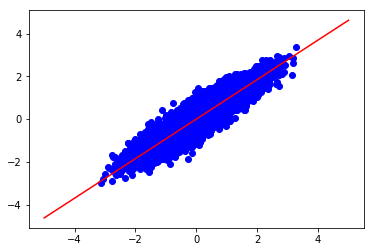

The values for w are [[2.91437176e-16]
 [9.24756299e-01]] and the gradient is [[-0.00000000e+00]
 [-5.49960077e-15]]


In [43]:
# Task 4: Stochastic gradient descent
import random
random.seed(20)

def stochastic_descent(y, tx, w, step):
    # randomize the order of the dataset X
    # keep randomized idx and transform target set
    
    rand_idx = (np.random.permutation(np.arange(tx.shape[0])))
    tx_rand = tx[rand_idx, :]
    target_rand = target_scaled[rand_idx,:]
    
    # create function that computes gradients
    def compute_gradient(y, tx, w):
        error = y - np.dot(tx, w)
        grad = - np.dot(tx.T, error) / tx.shape[0]
        return grad
    
    for idx, sample in enumerate(tx_rand):
        gradient = compute_gradient(target_rand, tx_rand, w)
        w = w - step * gradient
        # print('Loop {}. W is {} and gradient is {}'.format(idx, w, gradient))
    
    plt.scatter(height_scaled, target_scaled, c='blue')
    plt.plot([-5,5],[-5 * w.item(1) + w.item(0), 5 * w.item(1) + w.item(0)], c='red')
    plt.show()
    print('The values for w are {} and the gradient is {}'.format(w, gradient))

w_test = np.matrix([-15, -10]).T

stochastic_descent(target_scaled, X, w_test, 0.01)

In [73]:
# Task 5: Simulating the presence of outliers

# Add outlier points to X
X_outs = np.matrix([1,4]*1000).reshape([1000,2])
y_outs = np.matrix([-2] * 1000).reshape([1000,1])

X_outliers = np.concatenate((X, X_outs), axis=0)
y_outliers = np.concatenate((target_scaled, y_outs), axis=0)

w_test = np.matrix([-20, -20]).T
plt.scatter(X_outs[:,1]., y_outs.item(:))
gradient_descent(y_outliers, X_outliers, w_test, 0.1, 300)

SyntaxError: invalid syntax (<ipython-input-73-ff70aa320fdd>, line 11)